# TEXT MINING for PRACTICE: API를 이용한 데이터 수집
---

## 1. 추가 인증 없이 데이터 요청이 가능한 경우

In [1]:
import pprint
import requests
import json

### 1-1. 유명인의 명언을 제공해주는 API를 활용해 봅시다! 
https://quotes.rest/

In [25]:
url = "https://quotes.rest/qod"

In [26]:
res = requests.get(url).text
json.loads(res)

{'success': {'total': 1},
 'contents': {'quotes': [{'quote': 'A quitter never wins and a winner never quits',
    'length': '45',
    'author': 'Napoleon Hill',
    'tags': ['inspire', 'tod', 'winning'],
    'category': 'inspire',
    'date': '2019-09-05',
    'permalink': 'https://theysaidso.com/quote/napoleon-hill-a-quitter-never-wins-and-a-winner-never-quits',
    'title': 'Inspiring Quote of the day',
    'background': 'https://theysaidso.com/img/bgs/man_on_the_mountain.jpg',
    'id': 'DcEHIRjDxWBWNk_sZIK3RweF'}],
  'copyright': '2017-19 theysaidso.com'}}

In [32]:
data = json.loads(res)['contents']
pprint.pprint(data['quotes'])

[{'author': 'Napoleon Hill',
  'background': 'https://theysaidso.com/img/bgs/man_on_the_mountain.jpg',
  'category': 'inspire',
  'date': '2019-09-05',
  'id': 'DcEHIRjDxWBWNk_sZIK3RweF',
  'length': '45',
  'permalink': 'https://theysaidso.com/quote/napoleon-hill-a-quitter-never-wins-and-a-winner-never-quits',
  'quote': 'A quitter never wins and a winner never quits',
  'tags': ['inspire', 'tod', 'winning'],
  'title': 'Inspiring Quote of the day'}]


In [54]:
# 변수 사용의 안 좋은 예
print(f"{data['quotes'][0]['author']} said, \"{data['quotes'][0]['quote']}\".")

Napoleon Hill said, "A quitter never wins and a winner never quits".


In [79]:
# 좋은 예
for quote in data['quotes']:
    print(f"{quote['author']} said, \"{quote['quote']}\".")

Napoleon Hill said, "A quitter never wins and a winner never quits".


In [33]:
from IPython.display import Image
Image(url=data['quotes'][0]['background'])

In [47]:
#사용자 인증을 하지 않는 API의 경우, 분/시간 당 요청수가 많이 제한됩니다...
res = requests.get(url).text
json.loads(res)

{'error': {'code': 429,
  'message': 'Too Many Requests: Rate limit of 10 requests per hour exceeded. Please wait for 59 minutes and 58 seconds.'}}

### 1-2. 가상의 유저 프로필을 제공해주는 API를 살펴봅시다
https://randomuser.me

In [60]:
res = requests.get('https://randomuser.me/api/')

pprint.pprint(json.loads(res.text))

{'info': {'page': 1,
          'results': 1,
          'seed': '6d5eb72d07a73877',
          'version': '1.2'},
 'results': [{'cell': '(105)-604-5517',
              'dob': {'age': 26, 'date': '1992-11-21T22:04:17Z'},
              'email': 'jean-michel.piersma@example.com',
              'gender': 'male',
              'id': {'name': 'BSN', 'value': '08099386'},
              'location': {'city': 'westerveld',
                           'coordinates': {'latitude': '44.2207',
                                           'longitude': '-134.8393'},
                           'postcode': 84567,
                           'state': 'groningen',
                           'street': '9298 agnietenstraat',
                           'timezone': {'description': 'Kabul',
                                        'offset': '+4:30'}},
              'login': {'md5': '5365fe0221ef90bc6a3cb22e1ad34516',
                        'password': 'carbon',
                        'salt': 'HCoBHQeG',
            

In [62]:
# 대부분의 API는 여러개의 결과를 한번에 응답할 수 있도록 추가 파라미터를 받습니다.
res = requests.get('https://randomuser.me/api/?results=10')

print(len(json.loads(res.text)['results']))

10


### 1-3. 이미지 데이터를 API로 받아보자

In [20]:
url = "https://source.unsplash.com/random/300x300"
res = requests.get(url)
print(res)


<Response [200]>


In [21]:
res.content

b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00H\x00H\x00\x00\xff\xe2\x02\x1cICC_PROFILE\x00\x01\x01\x00\x00\x02\x0clcms\x02\x10\x00\x00mntrRGB XYZ \x07\xdc\x00\x01\x00\x19\x00\x03\x00)\x009acspAPPL\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xf6\xd6\x00\x01\x00\x00\x00\x00\xd3-lcms\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\ndesc\x00\x00\x00\xfc\x00\x00\x00^cprt\x00\x00\x01\\\x00\x00\x00\x0bwtpt\x00\x00\x01h\x00\x00\x00\x14bkpt\x00\x00\x01|\x00\x00\x00\x14rXYZ\x00\x00\x01\x90\x00\x00\x00\x14gXYZ\x00\x00\x01\xa4\x00\x00\x00\x14bXYZ\x00\x00\x01\xb8\x00\x00\x00\x14rTRC\x00\x00\x01\xcc\x00\x00\x00@gTRC\x00\x00\x01\xcc\x00\x00\x00@bTRC\x00\x00\x01\xcc\x00\x00\x00@desc\x00\x00\x00\x00\x00\x00\x00\x03c2\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x

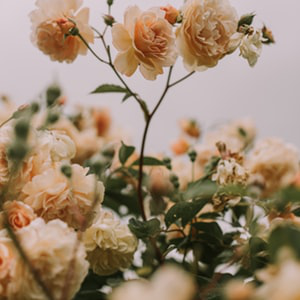

In [22]:
with open("test.png", "wb") as f:
    f.write(res.content)

img = Image.open("test.png")
img 

## 2. 인증 절차가 필요한 API
대부분의 유용한 API는 무작위 요청을 방지하기 위해, 사용자 인증 정보를 요구합니다.

### 2-1. 네이버 검색 API 활용
예제코드는 : https://developers.naver.com/docs/search/blog/

In [77]:
import urllib.request

client_id = "YOUR_CLIENT_ID"
client_secret = "YOUR_CLIENT_SECRET"
encText = urllib.parse.quote("KB금융")
url = "https://openapi.naver.com/v1/search/news?display=50&query=" + encText # json 결과
# url = "https://openapi.naver.com/v1/search/blog.xml?query=" + encText # xml 결과
request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
response = urllib.request.urlopen(request)
rescode = response.getcode()
if(rescode==200):
    response_body = response.read()
    pprint.pprint(json.loads(response_body.decode('utf-8')))
else:
    print("Error Code:" + rescode)

{'display': 50,
 'items': [{'description': '신한<b>금융</b>지주는 신한퓨쳐스랩, <b>KB금융</b>지주는 '
                           "<b>KB</b>이노베이션 허브, 우리은행은 디노랩, KEB하나은행은 '1Q에자일 랩'을 "
                           '통해 스타트업을 발굴·지원하고 있다. 이 행장은 10월 NH디지털챌린지플러스 2기 시작을 '
                           '앞두고 1기에... ',
            'link': 'http://www.businesspost.co.kr/BP?command=article_view&num=142373',
            'originallink': 'http://www.businesspost.co.kr/BP?command=article_view&num=142373',
            'pubDate': 'Thu, 05 Sep 2019 17:56:00 +0900',
            'title': '[오늘Who] 이대훈,스타트업에 공들여 NH농협은행 하나씩 수확 시작'},
           {'description': '윤종규 <b>KB금융</b>지주 회장이 4일 서울 광진구 그랜드 워커힐 호텔에서 '
                           "열린'2019 <b>KB</b> 우수기업고객 CEO 초청 포럼'에서 고객들에게 인사를 하고 "
                           "있다./사진제공=<b>KB</b>국민은행 '초연결시대, 사람과 연결하다'라는 주제로 "
                           '진행된... ',
            'link': 'http://www.asiatime.co.kr/news/articleView.html?idxno=268886',
            'originallink': 'http://www.asiatime.co.k

### 2-2. 다음 검색 API 활용

In [80]:
# Q.위의 코드를 활용하여 카카오 API를 이용해보자.
# 참고 웹사이트 https://developers.kakao.com/docs/restapi/search